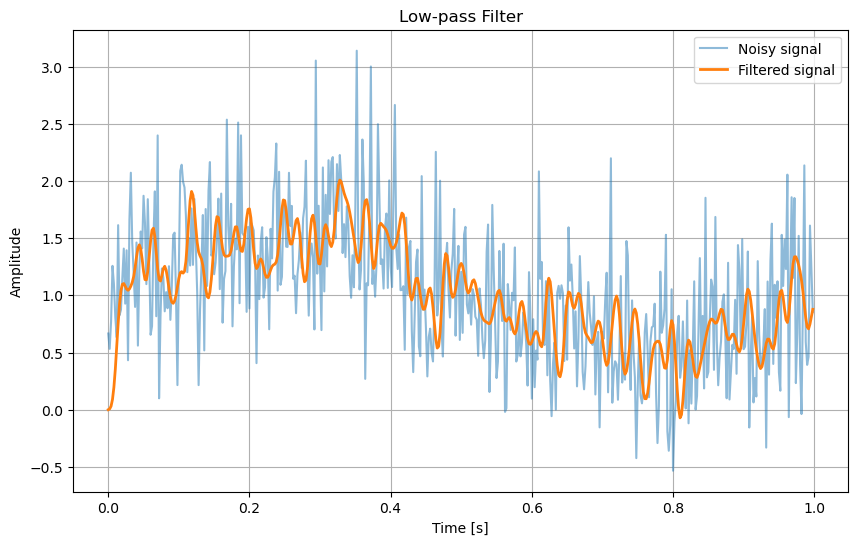

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, freqz

# Design a Butterworth low-pass filter
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

# Apply the filter to the data
def lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Example usage
if __name__ == "__main__":
    # Sample rate and desired cutoff frequency (in Hz)
    fs = 500.0
    cutoff = 50.0

    # Generate a sample signal: 1.0 + 0.5 * sin(2 * pi * 1 * t) + noise
    T = 1.0 / fs
    n = int(1.0 / T)  # total number of samples
    t = np.linspace(0, n * T, n, endpoint=False)
    a = 0.5
    freq = 1.0
    x = 1.0 + a * np.sin(2 * np.pi * freq * t) + 0.5 * np.random.normal(size=t.shape)

    # Apply the low-pass filter
    y = lowpass_filter(x, cutoff, fs)

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(t, x, label='Noisy signal', alpha=0.5)
    plt.plot(t, y, label='Filtered signal', linewidth=2)
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.title('Low-pass Filter')
    plt.legend()
    plt.grid()
    plt.show()
